### Load Data

In [6]:
import scipy.io as sio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

In [107]:
# Normalized
# rdata = sio.loadmat('E:/ML/data/Data_normalized/rData.mat')['rData_all'].T
# Original
rdata = sio.loadmat('E:/ML/data/Data_original/rData.mat')['rData_all'].T
pd.DataFrame(rdata).loc[0:5,143:154]

,143,144,145,146,147,148,149,150,151,152,153,154
0,375.0,1012.0,1078.0,4490.0,226.0,2.4,2.1,2.5,2.3,1.8,2.5,0.7
1,309.0,1053.0,1310.0,4359.0,238.0,2.5,1.5,3.1,2.4,1.4,3.2,1.0
2,219.0,744.0,967.0,4160.0,228.0,2.2,2.5,1.6,1.6,1.1,2.2,1.1
3,224.0,739.0,1124.0,3799.0,167.0,2.3,2.2,2.3,1.5,1.0,2.4,0.4
4,333.0,820.0,1014.0,5318.0,258.0,3.0,2.3,2.1,3.3,1.8,3.2,1.1
5,188.0,781.0,1026.0,4185.0,164.0,1.8,2.7,1.2,1.3,1.6,2.0,0.5


In [42]:
# Labels
pos = sio.loadmat('E:/ML/data/PANSS_original/posPANSS.mat')['pos_all'].T
neg = sio.loadmat('E:/ML/data/PANSS_original/negPANSS.mat')['neg_all'].T
gen = sio.loadmat('E:/ML/data/PANSS_original/genPANSS.mat')['gen_all'].T
tot = sio.loadmat('E:/ML/data/PANSS_original/totPANSS.mat')['tot_all'].T
score = np.hstack((pos,neg,gen,tot))
score.shape

(176, 4)

### Data Correlation

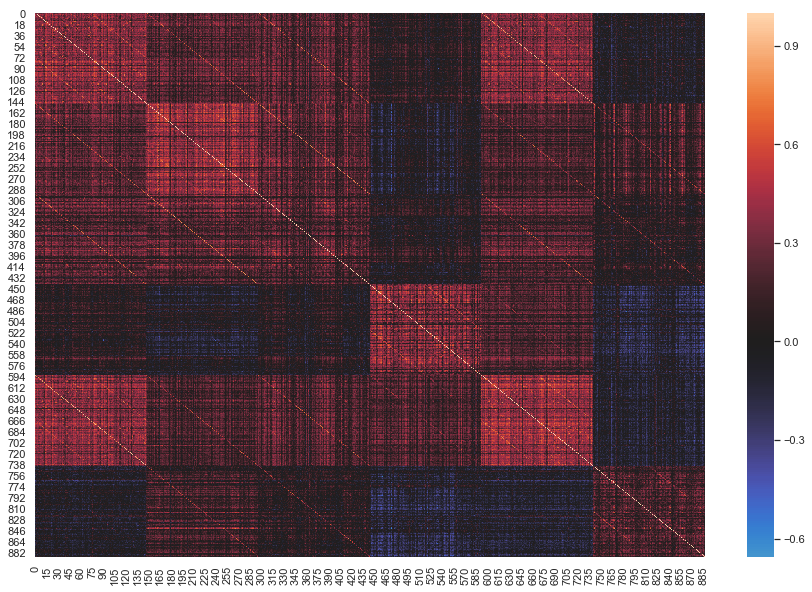

In [94]:
r_corr = pd.DataFrame(data=np.hstack((rdata,score))).corr()
plt.figure(figsize=(15,10))
ax = sns.heatmap(r_corr.loc[0:887,0:887],center=0)

**PANSS and different feature types**

In [121]:
def mean_features(data, stepsize):
    tmp1 = []
    length = data.shape[1]
    num  = int(length/stepsize)
    for i in range(0,num):
        mean = np.mean(data[:,i*stepsize:(i+1)*stepsize-1],
                       axis=1)
        tmp1.append(mean)
    tmp = np.array(tmp1).reshape(num,176).T
    return tmp

rdata_m = mean_features(rdata, 148)
pd.DataFrame(rdata_m).describe()

,0,1,2,3,4,5
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1201.481602,2.672020,25.000116,2.478085,3267.883194,0.127558
std,129.532889,0.613390,4.297061,0.095468,397.397593,0.004445
min,811.843537,1.744898,15.836735,2.201585,2160.265306,0.118041
25%,1119.025510,2.231463,22.204082,2.420529,2991.828231,0.124767
50%,1206.333333,2.567347,24.173469,2.482214,3305.112245,0.127347
75%,1287.707483,2.959014,27.202381,2.544539,3526.993197,0.129879
max,1517.931973,5.021769,46.755102,2.702122,4236.163265,0.147592


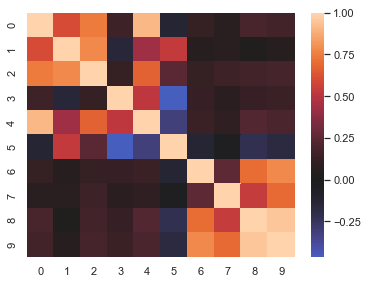

In [125]:
rm_corr = pd.DataFrame(np.hstack((rdata_m,score))).corr()
plt.figure(figsize=(6,4.5))
ax = sns.heatmap(rm_corr,center=0)

**PANSS and individual features**

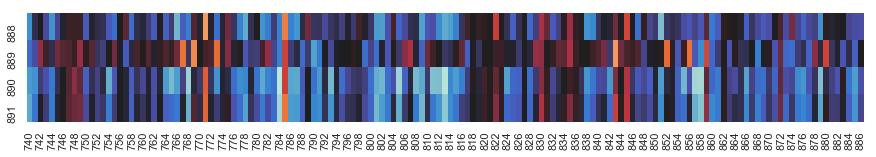

In [95]:
def palplot_corr(df, stepsize):
    length = df.shape[1]
    num  = int(length/stepsize)
    for i in range(0,num):
        tmp = df.iloc[:,i*stepsize:(i+1)*stepsize-1]
        sns.heatmap(tmp,cbar=False,center=0)

plt.figure(figsize=(15,2))
palplot_corr(r_corr.loc[888:891,0:887], 148)

**Recombined PANSS score**

In [197]:
corr_list = []
corr_var = []
corr_mean = []
corr_absmean = []
corr_med = []
corr_weight = []
for i in range(11):
    w1 = round(0.1*i,1)
    for j in range(10-i):
        w2 = round(0.1*j,1)
        w3 = round(0.1*(10-i-j),1)
        add = w1*pos + w2*neg + w3*gen
        df_re = pd.DataFrame(np.hstack((rdata,add))).corr()
        corr_list.append(df_re)
        tmp = np.array(df_re.loc[888:888,0:887])
        
        var = np.var(tmp)
        mean = np.mean(tmp)
        absmean = np.mean(np.abs(tmp))
        med = np.median(tmp)
        
        corr_var.append(var)
        corr_mean.append(mean)
        corr_med.append(med)
        corr_absmean.append(absmean)
        corr_weight.append([w1,w2,w3])

print('Index of Maximum Variance:',corr_var.index(max(corr_var)),'...Weight:',
      corr_weight[corr_var.index(max(corr_var))])
print('Index of Maximum Absolute Mean:',corr_absmean.index(max(corr_absmean)),'...Weight:',
      corr_weight[corr_absmean.index(max(corr_absmean))])
print('Index of Maximum Median:',corr_med.index(max(corr_med)),'...Weight:',
      corr_weight[corr_med.index(max(corr_med))])
print('Index of Maximum Mean:',corr_mean.index(max(corr_mean)),'...Weight:',
      corr_weight[corr_mean.index(max(corr_mean))])


Index of Maximum Variance: 0 ...Weight: [0.0, 0.0, 1.0]
Index of Maximum Absolute Mean: 0 ...Weight: [0.0, 0.0, 1.0]
Index of Maximum Median: 11 ...Weight: [0.1, 0.1, 0.8]
Index of Maximum Mean: 28 ...Weight: [0.3, 0.1, 0.6]


### Feature Engineering

In [199]:
X = rdata#np.hstack([rdata,rdata_m])
y = gen
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.25, random_state=0)
X_train.shape

(132, 888)

In [ ]:
def LeastR(X,y,spa,opts):
    